
Training with sigmoid activation...
Epoch 1/5
375/375 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.8429 - loss: 0.5710 - val_accuracy: 0.9227 - val_loss: 0.2634
Epoch 2/5
375/375 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.9279 - loss: 0.2418 - val_accuracy: 0.9432 - val_loss: 0.2051
Epoch 3/5
375/375 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.9455 - loss: 0.1841 - val_accuracy: 0.9529 - val_loss: 0.1633
Epoch 4/5
375/375 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.9566 - loss: 0.1440 - val_accuracy: 0.9603 - val_loss: 0.1400
Epoch 5/5
375/375 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.9658 - loss: 0.1152 - val_accuracy: 0.9600 - val_loss: 0.1303

Training with tanh activation...
Epoch 1/5
375/375 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.9099 - loss: 0.3000 - val_accuracy: 0.9499 - val_loss: 0.1754
Epoch 2/5
375/375 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.9558 - loss: 0.1440 - val_accuracy: 0.9619 - val_loss: 0.1298
Epoch 3/5
375/375 ━━━━━━━━━━━━━━━━━━━━ 3

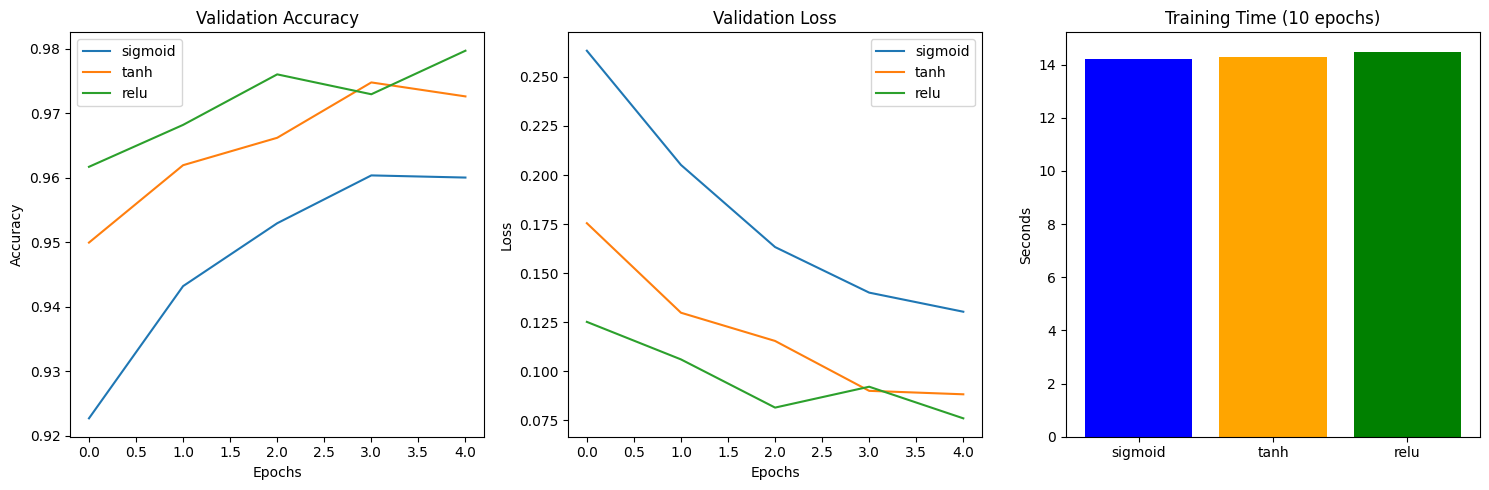

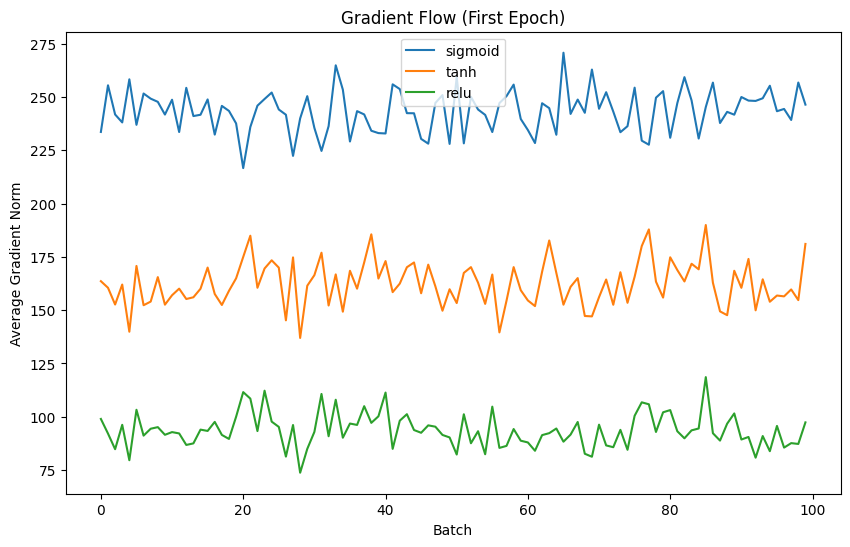

In [2]:
import tensorflow as tf
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt
import time

(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0
x_train = x_train.reshape(-1, 28*28)
x_test = x_test.reshape(-1, 28*28)

def build_model(activation='relu'):
    model = models.Sequential([
        layers.Dense(512, activation=activation, input_shape=(784,)),
        layers.Dense(256, activation=activation),
        layers.Dense(10, activation='softmax')
    ])
    model.compile(optimizer='adam',
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])
    return model

activations = ["sigmoid", "tanh", "relu"]
histories = {}
times = {}

for act in activations:
    print(f"\nTraining with {act} activation...")
    model = build_model(act)
    start = time.time()
    history = model.fit(x_train, y_train, epochs=5, batch_size=128,
                        validation_split=0.2, verbose=1)
    end = time.time()

    histories[act] = history
    times[act] = end - start

plt.figure(figsize=(15,5))

plt.subplot(1,3,1)
for act, history in histories.items():
    plt.plot(history.history['val_accuracy'], label=act)
plt.title("Validation Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()

plt.subplot(1,3,2)
for act, history in histories.items():
    plt.plot(history.history['val_loss'], label=act)
plt.title("Validation Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()

plt.subplot(1,3,3)
plt.bar(times.keys(), times.values(), color=['blue','orange','green'])
plt.title("Training Time (10 epochs)")
plt.ylabel("Seconds")

plt.tight_layout()
plt.show()

def gradient_flow(activation):
    model = build_model(activation)
    optimizer = tf.keras.optimizers.Adam()
    grads_norm = []

    for step, (x_batch, y_batch) in enumerate(tf.data.Dataset.from_tensor_slices((x_train, y_train)).batch(256).take(100)): # first 100 batches
        with tf.GradientTape() as tape:
            logits = model(x_batch, training=True)
            loss_value = tf.keras.losses.sparse_categorical_crossentropy(y_batch, logits)
        grads = tape.gradient(loss_value, model.trainable_variables)
        norm = tf.reduce_mean([tf.norm(g) for g in grads if g is not None])
        grads_norm.append(norm.numpy())

    return grads_norm

gradients = {act: gradient_flow(act) for act in activations}

plt.figure(figsize=(10,6))
for act, norms in gradients.items():
    plt.plot(norms, label=act)
plt.title("Gradient Flow (First Epoch)")
plt.xlabel("Batch")
plt.ylabel("Average Gradient Norm")
plt.legend()
plt.show()
